<h1 align=center><font size=5>Neural Networks</font></h1>

### Table of contents

- [Background](#background)
- [Data Example](#data)
- [Data Preparation](#data_prep)
- [Neural Networks from Scratch](#LR_scratch)
- [Neural Networks using Sklearn](#LR_sklearn)

### Background <a id="background"></a>

Here are the summary of formulas from the lecture.

1. Forward propagation

$$Z^{[1]} = W^{[1]}X + b^{[1]}$$

$$A^{[1]} = g{(Z^{[1]})}$$

$$Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}$$

$$A^{[2]} = g{( Z^{[2]} )}$$

where $X = [x_1, x_2, ..., x_N]$ is the data matrix with $N$ samples, and $g(.)$ is an activation function like sigmoid:

$$g(x) = \frac{1}{1 + exp(-x)}$$

2. Backward propagation (vectorized forms)

$$dZ^{[2]} = A^{[2]} - Y$$ 

$$dW^{[2]} = \frac{1}{N} dZ^{[2]} {A^{[1]}}^T$$

$$db^{[2]} = \frac{1}{N} \sum dZ^{[2]} $$

$$dZ^{[1]} = ({W^{[2]}}^T  dZ^{[2]}) * {g^{[1]'}} (Z^{[1]})$$

$$dW^{[1]} = \frac{1}{N} dZ^{[1]} {X}^T$$

$$db^{[1]} = \frac{1}{N} \sum dZ^{[1]} $$


where 


$$ \frac{dJ}{dZ^{[2]}} = \frac{dJ}{dA^{[2]}} \frac{dA^{[2]}}{dZ^{[2]}} \implies {dZ^{[2]}} = dA^{[2]} {g^{[2]'}} (Z^{[2]}) = A^{[2]} - Y $$


$$ \frac{dJ}{dW^{[2]}}  = \frac{dJ}{dZ^{[2]}} \frac{dZ^{[2]}}{dW^{[2]}} \implies {dW^{[2]}} = \frac{1}{N} dZ^{[2]} {A^{[1]}}^T$$

$$...$$

where ${g'(z)} = \frac{d}{dz} g(z)$. In the case of sigmoid fuction we have:

$$
{\sigma}'(z) = \sigma(z) (1 - \sigma(z))
$$

3. Loss function (cross entropy)

$$J = \frac{1}{N} \sum\limits_{i = 0}^{N} \large{(} \small - y^{(i)}\log\left(a^{[2] (i)}\right) - (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)}$$

### Data  Example <a id="data"></a>

In [ ]:
import numpy as np
np.random.seed(123)

# XOR dataset
n_samples = 1000
mu, sigma = 2, 3
X = sigma * np.random.randn(n_samples, 2) + mu
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (1000, 2)
y shape: (1000,)


&#x270d; Plot the data.

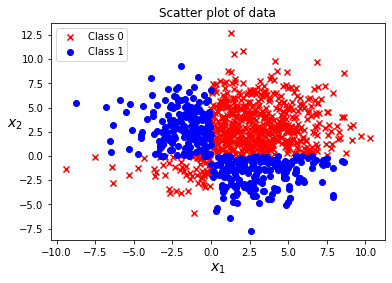

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[y == 0, 0], X[y == 0, 1], c= 'r', marker= 'x', label= 'Class 0') 
plt.scatter(X[y == 1, 0], X[y == 1, 1], c= 'b', marker= 'o', label= 'Class 1') 
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", rotation=0, fontsize=14)
plt.title('Scatter plot of data')
plt.legend(loc="upper left")
plt.show()

### Data Preparation <a id="data_prep"></a>

&#x270d; 0.1) Split the data in a stratified fashion into training set with 80% of the samples and test set with the remaining 20%.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                     test_size= 0.2, 
                     stratify= y,
                     random_state= 123)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (800, 2)
X_test shape: (200, 2)


&#x270d;0.2) Transform features by scaling each feature to the range of [0, 1].

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MinMaxScaler(copy=True, feature_range=(0, 1))


### Neural Networks from Scratch <a id="NN_scratch"></a>

#### STEP BY STEP


#### 1)Implement the init function

In [ ]:
class Neural_Network:   
    def __init__(self, n_x = 2, n_h = 3, n_y = 1, lr= 0.01, num_iter= 100):    
        self.W1 = np.random.randn(n_h, n_x) 
        self.b1 = np.random.randn(n_h, 1)
        self.W2 = np.random.randn(n_y, n_h)
        self.b2 = np.random.randn(n_y, 1)
        self.lr = lr
        self.num_iter = num_iter
        print(self.W1.shape,self.b1.shape,self.W2.shape,self.b2.shape)
g=Neural_Network()


(3, 4) (3, 1) (1, 3) (1, 1)


#### 2)Implement the sigmoid and its differential

In [ ]:
class Neural_Network:
    def __init__(self, n_x = 2, n_h = 3, n_y = 1, lr= 0.01, num_iter= 100):    
        self.W1 = np.random.randn(n_h, n_x) 
        self.b1 = np.random.randn(n_h, 1)
        self.W2 = np.random.randn(n_y, n_h)
        self.b2 = np.random.randn(n_y, 1)
        self.lr = lr
        self.num_iter = num_iter
        
    def sigmoid(self, t):
        return 1/(1+np.exp(-t))

    def sigmoid_derivative(self, t):
        return self.sigmoid(t)*(1 - self.sigmoid(t))
g=Neural_Network()
g.sigmoid_derivative(np.array([1,2,3]))

array([0.19661193, 0.10499359, 0.04517666])

#### 3) Implement the forward propergation

In [ ]:
np.random.seed(123)
class Neural_Network:
    def __init__(self, n_x = 2, n_h = 3, n_y = 1, lr= 0.01, num_iter= 100):    
        self.W1 = np.random.randn(n_h, n_x) 
        self.b1 = np.random.randn(n_h, 1)
        self.W2 = np.random.randn(n_y, n_h)
        self.b2 = np.random.randn(n_y, 1)
        self.lr = lr
        self.num_iter = num_iter
        
    def sigmoid(self, t):
        return 1/(1+np.exp(-t))

    def sigmoid_derivative(self, t):
        return self.sigmoid(t)*(1 - self.sigmoid(t))    
    
    def feedforward(self, X):
        
        self.Z1 = np.dot(self.W1, X.T) + self.b1     # np.dot  , np.matmul() , @      
        self.A1 = self.sigmoid(self.Z1)   
                
        self.Z2 = np.dot(self.W2, self.A1) + self.b2       
        self.A2 = self.sigmoid(self.Z2)  
        return self.A2

g=Neural_Network()
g.feedforward(np.random.randn(3,2))

array([[0.72833508, 0.71038019, 0.77730154]])

#### 4) Implement the backward backpropagation 

In [ ]:
np.random.seed(123)
class Neural_Network:
    def __init__(self, n_x = 2, n_h = 3, n_y = 1, lr= 0.01, num_iter= 100):    
        self.W1 = np.random.randn(n_h, n_x) 
        self.b1 = np.random.randn(n_h, 1)
        self.W2 = np.random.randn(n_y, n_h)
        self.b2 = np.random.randn(n_y, 1)
        self.lr = lr
        self.num_iter = num_iter
        
    def sigmoid(self, t):
        return 1/(1+np.exp(-t))

    def sigmoid_derivative(self, t):
        return self.sigmoid(t)*(1 - self.sigmoid(t))    
    
    def feedforward(self, X):
        
        self.Z1 = np.dot(self.W1, X.T) + self.b1   
        self.A1 = self.sigmoid(self.Z1)   
                
        self.Z2 = np.dot(self.W2, self.A1) + self.b2       
        self.A2 = self.sigmoid(self.Z2)  
        
        return self.A2
    
    def backpropagation(self, X, y):
        N = X.shape[0] # Number of example
        dZ2 = self.A2 - y   #(1,1000) - (1,1) = (1,1000)
        self.dW2 = (1/N) * np.dot(dZ2, self.A1.T) #(1,1000)*(1000,3) =(1,3)
        self.db2 = (1/N) * np.sum(dZ2, axis =1, keepdims = True)  #db2   d=b2     w@X   -> 3x3  W@X+b    3X1-->  3
        dZ1 = np.dot(self.W2.T, dZ2)*self.sigmoid_derivative(self.Z1)  
        self.dW1 = (1/N) * np.dot(dZ1, X) # (3,1000)*(1000,2)
        self.db1 = (1/N) * np.sum(dZ1, axis =1, keepdims = True)
g=Neural_Network()
g.feedforward(np.random.randn(3,2))
g.backpropagation(np.random.randn(3,2),np.array([1,0,1]))
print(g.dW2,'\n\n',g.db2,'\n\n',g.dW1,'\n\n',g.db1)

[[ 0.1219683  -0.05741648  0.10865604]] 

 [[0.0720056]] 

 [[-0.07095792  0.05087465]
 [ 0.01099942  0.00382261]
 [ 0.00160083  0.00023303]] 

 [[-0.04198442]
 [ 0.02052483]
 [ 0.00257793]]


#### 5) Culculate the loss of the birnary classification:


In [ ]:
np.random.seed(123)
def loss(y, y_hat):
     return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()
y_test=np.random.rand(5,1)
y_hat=np.random.rand(5,1)
loss(y_test, y_hat)

1.2163243147764142

&#x270d; Implement a two layer neural network from scratch.

In [ ]:
np.random.seed(123)
class Neural_Network:
    def __init__(self, n_x = 2, n_h = 3, n_y = 1, lr= 0.01, num_iter= 100):    
        self.W1 = np.random.randn(n_h, n_x) 
        self.b1 = np.random.randn(n_h, 1)
        self.W2 = np.random.randn(n_y, n_h)
        self.b2 = np.random.randn(n_y, 1)
        self.lr = lr
        self.num_iter = num_iter
        
    def sigmoid(self, t):
        return 1/(1+np.exp(-t))

    def sigmoid_derivative(self, t):
      #  return t*(1-t)    A1
        return self.sigmoid(t)*(1 - self.sigmoid(t))     
    
    def feedforward(self, X):
        
        self.Z1 = np.dot(self.W1, X.T) + self.b1   
        self.A1 = self.sigmoid(self.Z1)   
                
        self.Z2 = np.dot(self.W2, self.A1) + self.b2       
        self.A2 = self.sigmoid(self.Z2)  
        
        return self.A2
    
    def backpropagation(self, X, y):
        
        N = X.shape[0] # Number of examples

        dZ2 = self.A2 - y.T   #(1,1000) - (1,1) = (1,1000)
        
        self.dW2 = (1/N) * np.dot(dZ2, self.A1.T) #(1,1000)*(1000,3) =(1,3)
        
        self.db2 = (1/N) * np.sum(dZ2, axis =1, keepdims = True)
        
        dZ1 = np.dot(self.W2.T, dZ2)*self.sigmoid_derivative(self.Z1)  
        
        self.dW1 = (1/N) * np.dot(dZ1, X) # (3,1000)*(1000,2)
        self.db1 = (1/N) * np.sum(dZ1, axis =1, keepdims = True)


    def update_parameters(self):
        self.W1 -= self.lr * self.dW1
        self.b1 -= self.lr * self.db1
        self.W2 -= self.lr * self.dW2
        self.b2 -= self.lr * self.db2
                
    
    # Define the cross entropy loss
    def loss(self, y, y_hat):
        return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()
    
    
    def fit(self, X, y):
        
        loss_history = []
        for iter in range(self.num_iter):
            
            y_hat = self.feedforward(X)
            
            loss_history.append(self.loss(y, y_hat))
            
            self.backpropagation(X, y)
            
            self.update_parameters() 
            
        return loss_history  
            
    # Calculate probability estimates
    def predict_prob(self, X):
        return self.feedforward(X)
        #here we have number between 0 and 1, for example 0.6
    
    # Predict class labels for samples in X
    def predict(self, X):
        return self.predict_prob(X).round() 
        #here if we have 0.6 -> we return 1
        #     if we have 0.4 -> we return 0

(1, 200) (200, 2)
Accuracy over test set: 0.77


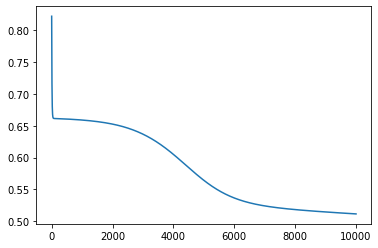

In [ ]:
# Create an instance of the above class
lr = Neural_Network(n_x = 2, n_h = 3, n_y = 1, lr= 0.1, num_iter= 10000)


# Fit the model over training set
J = lr.fit(X_train, y_train)

plt.plot(J)
# Make predictions over test set

y_test_pred = lr.predict(X_test)
print(y_test_pred.shape,X_test.shape)
# Measure accuracy over test set
accuracy = (y_test_pred == y_test).mean()
print('Accuracy over test set:', accuracy)

### Neural Networks using SKlearn <a id="NN_sklearn"></a>

#### Model Training

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

# Fit the data
mlp.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

#### Model Evaluation

&#x270d; Plot loss over training iterations. 

&#x270d; Measure classification accuracy over the training/test sets.

In [ ]:
from sklearn.metrics import accuracy_score

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

print("Training Accuracy: {0:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("Testing Accuracy: {0:.2f}".format(accuracy_score(y_test, y_test_pred)))

Training Accuracy: 0.83
Testing Accuracy: 0.82


&#x270d; Build a text report showing the main classification metrics including precision, recall, f1-score, and accuracy.

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       125
           1       0.77      0.73      0.75        75

    accuracy                           0.82       200
   macro avg       0.81      0.80      0.81       200
weighted avg       0.82      0.82      0.82       200



&#x270d; Compute and plot confusion matrix.

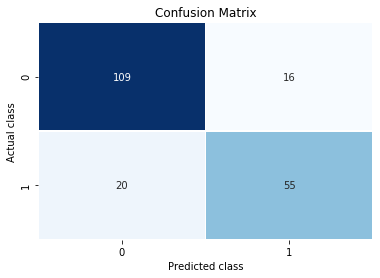

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(6,4))

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion Matrix");

#### Hyper-parameters Tuning

&#x270d; Use GridSearchCV and find the best estimator.

In [ ]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

param_grid = {'hidden_layer_sizes': [(10,), (50,), (10, 10)],
             'activation': ['tanh', 'relu'],
             'learning_rate': ['constant', 'adaptive'],
             'max_iter': [500],
              'random_state': [123]}

mlp = MLPClassifier()
gs = GridSearchCV(mlp, param_grid, cv = 5, verbose= 1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   50.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['

&#x270d; What are the best obtained parameters?

In [ ]:
print("The best parameters are:\n%s" % (gs.best_params_)) 

The best parameters are:
{'activation': 'relu', 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'max_iter': 500, 'random_state': 123}


In [ ]:
y_train_pred = gs.predict(X_train)
y_test_pred = gs.predict(X_test)

print("Training Accuracy: {0:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("Testing Accuracy: {0:.2f}".format(accuracy_score(y_test, y_test_pred)))

Training Accuracy: 0.93
Testing Accuracy: 0.93


&#x270d; What is the difference between _StratifiedKFold_ and _GridSearchCV_ approaches?

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4],[4,5],[6,7]])
y = np.array([1,1,0,0,1,0])
kf = StratifiedKFold(n_splits=3)
print(kf.get_n_splits(X))


for train_index, test_index in kf.split(X,y):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]

3
TRAIN: [1 3 4 5] TEST: [0 2]
TRAIN: [0 2 4 5] TEST: [1 3]
TRAIN: [0 1 2 3] TEST: [4 5]
